## 2lvl or 3lvl Buck or Buckboost Power Dissapation

In [ ]:
# use modified cyntec model, which simplifies input parameter dependent variables
# added nxTON DCM calculation

#### to do:
1. verify ciss,coss and crss models vs. datasheet graphs
2. add self heating to mosfets
3. set up jupyter server for public use
4. create gui front end
5. add features to excel export function 

In [3]:
import libs.append_path
from add_python_libraries import *
import pd_filter_fcns

from bucklosses_dcm import Buckconverter_losses

from multiparam_multivar_generic import Multiparam_multivar_df as mp_mv_df

### Input Parameters

In [4]:
input_params = {'vin': 28,
                'vout': 9, #9,
                'pin': 164,
                'eff': 1,
                'fs':300e3, #318e3,   #839k,723k,635k carova at inductor
                'ton_mult':1,
                'tambient':35,
                'controller':'raa489300', #raa489110, raa489300
                'r_shunt_input':0.010,
                'rboot':1,
                'lout':{'family':'cmll063t', #'hbed053t', #'cmll063t', #'hbed053t', #'ihlp5050ez01', #'hbed053t',
                        'value(uH)':0.4, #1.0,
                        'config':'single'}, #single, series, parallel
                'lvl_config':'3 level',  #2 level, 4 level
                'hsfet_partnum':'SISH536DN', #'RBE030N04', #'SIRA12DDP',#'SISH536DN',#'SIZ342',#'SISH536DN', #'BSZ024N04LS6',#'SISH536DN', #'ISZ0702NLS',#'SIRA74DP',#'SIRA74DP','BSC059N04LS6',#'BSZ063N04LS6',#'SIR426DP',#'SIS488DN',#'SIRA74DP',#'SIS488DN',#'AONS66408',#'AONR66406',#'SIS488DN',#'SISS4410DN',#'SISA14DN',##'SISS4410DN',#'BSC059N04LS6', #'SIS488DN''SIR426DP'
                'lsfet_partnum':'SISS54DN',#'BSZ024N04LS6',#'SISA72ADN',#'SISA72ADN',#'AONS66408',#'SISS4410DN',#'SIRA74DP', #'AONS66408',#'BSC059N04LS6',#'BSZ024N04LS6',#'SIRA74DP',
                'q4_partnum':'AON6314', #'SHORT',#'SISS52DN',#'AON6314', #'SHORT', #'BSC020N03MSG',#'BSC020N03MSG',#'SIRA74DP',#,'AON7318',#'AONR36368',#'AON7318',#'SISA14DN',#'SISA14DN', #'SHORT', #'SISS52DN',
                'vgate':10,
                'm_hs':1,
                'm_ls':1,
                'rd':0.5,
                'caps':{'vin'   :{'partnum':'GRM32EC72A106KE05L','n':4},
                        'vout'  :{'partnum':'GRM32EC72A106KE05L','n':8},
                        'flying':{'partnum':'C2012X5R1H106K125AC','n':8}}
               }
input_params['iout'] = input_params['pin']*input_params['eff']/input_params['vout']

## Results

In [5]:
b_loss = Buckconverter_losses(input_params)
b_loss.p_totals#|b_loss.p_summary

{'hs fet': 1.0016,
 'ls fet': 0.6962,
 'q4 fet': 0.7981,
 'lout': 1.6024,
 'caps': 0.4581,
 'ic_with_gate': 0.362,
 'total': 7.3223,
 'efficiency': 0.9573,
 'Fs': 600000.0}

In [6]:
b_loss.p_summary

{'hs turn-on': 0.001,
 'hs turn-off': 0.673,
 'hs rdson': 0.312,
 'hs ringing': 0.016,
 'hs gate': 0.036,
 'ls rdson': 0.214,
 'ls bd': 0.26,
 'ls ring_qrr': 0.222,
 'ls gate': 0.12,
 'q4_rdson': 0.798,
 'lout rdc+rac': 0.823,
 'lout core': 0.78,
 'flying cap': 0.051,
 'input cap': 0.404,
 'board cu': 0.363,
 'ic': 0.05,
 'inp_shunt': 0.343}

### HS FET Turn on Loss

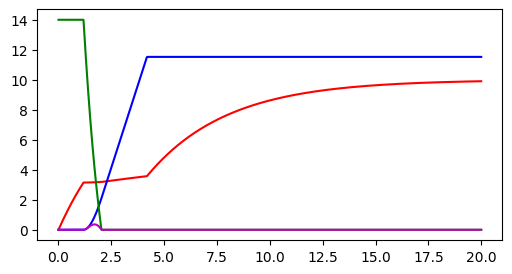

In [7]:
b_loss.hs_Losses_obj.fet_switch_on_obj.plot_vgs_id_vds()

### HS FET Turn off Loss

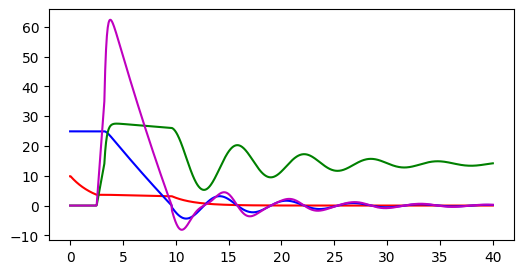

In [8]:
b_loss.hs_Losses_obj.fet_switch_off_obj.plot_vgs_id_vds()

## Total Losses - Bar Charts:  

In [13]:
df=pd.DataFrame.from_dict(b_loss.p_totals,orient='index',columns=['pdis'])


In [25]:
def scale(x):
    return x*1e-6
df.loc[['Fs'],['pdis']]=df.loc[['Fs'],['pdis']].apply(scale)

In [30]:
df

,pdis
hs fet,1.2143
ls fet,0.5588
q4 fet,0.7981
lout,1.6024
caps,0.4581
ic_with_gate,0.3860
total,7.4967
efficiency,0.9563
Fs,0.6000


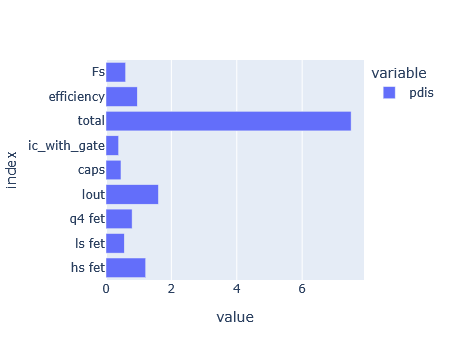

In [31]:
fig=px.bar(df,orientation='h')
fig.show()

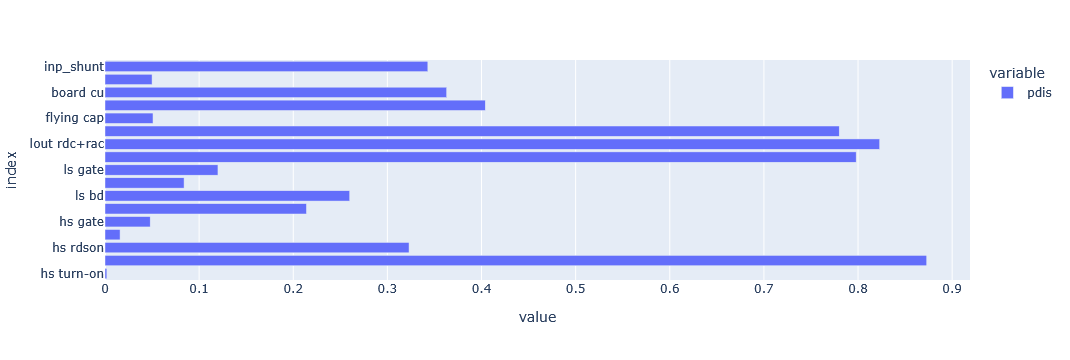

In [32]:
df=pd.DataFrame.from_dict(b_loss.p_summary,orient='index',columns=['pdis'])
fig=px.bar(df,orientation='h')
fig.show()

## Detailed Losses:  

In [33]:
df=pd.DataFrame.from_dict(b_loss.p_summary,orient='index',columns=['pdis'])
idx = df.index
val = df['pdis'].values
val_rev = np.flip(val)

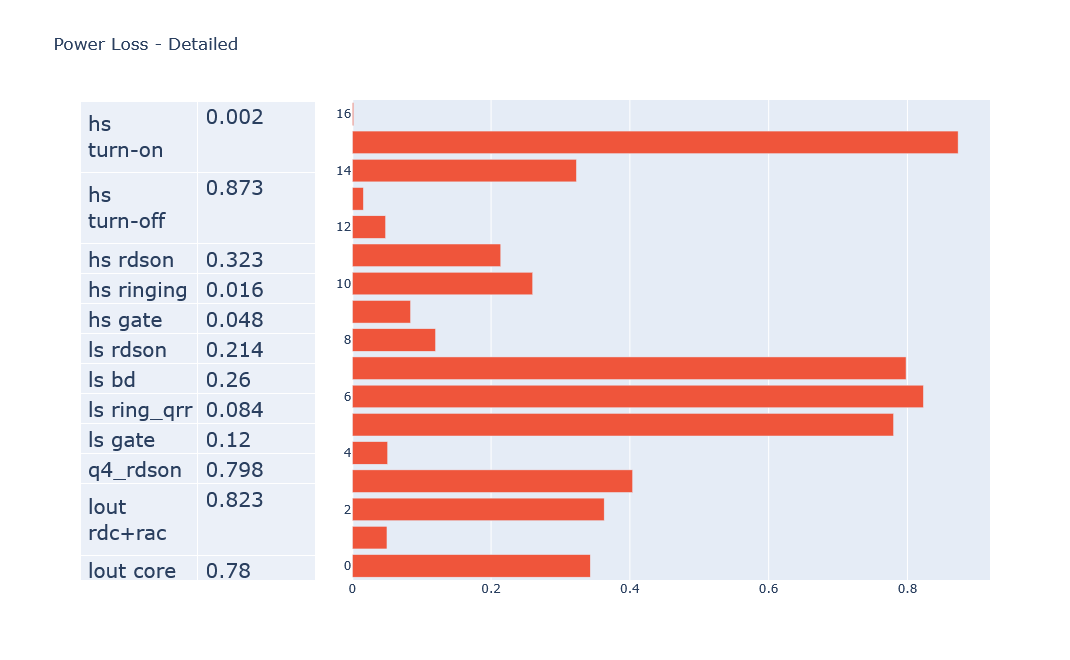

In [35]:
fig = make_subplots(
    rows=1,cols=2,
    column_widths=[.27,.73],
    horizontal_spacing = .04,
    specs=[[{"type":"table"},{"type":"bar"}]]
)
fig.add_trace(
    go.Table(
        header = dict(
            values=[' ',' '],
            height=1,
            font=dict(size=30)
        ),
        # header = dict(
        #     values = ['index','value'],
        #     font=dict(size=20),
        #     align="left"
        # ),
        cells = dict(
            values = [idx,val],
            font=dict(size=20),
            height=30,
            align="left"
        )
        
    ),
    
    row=1,col=1
)
fig.add_trace(
    go.Bar(
        x=val_rev,
        orientation='h'
    ),
    row=1,col=2
)
fig.update_layout(
    height=660,
    showlegend=False,
    title_text="Power Loss - Detailed",
)

fig.show()